### FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

1:Objective:

Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset. 


2:Dataset:

The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.


##### Part 1: Data Preparation and Exploration
1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.


In [5]:
#load the data
import pandas as pd
df=pd.read_csv(r"C:\Users\Akshata\OneDrive\Desktop\Assignment\Timeseries\exchange_rate.csv")
df.head(10)

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849
5,06-01-1990 00:00,0.7866
6,07-01-1990 00:00,0.7886
7,08-01-1990 00:00,0.7910
8,09-01-1990 00:00,0.7939
9,10-01-1990 00:00,0.7894


In [6]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [9]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [10]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.

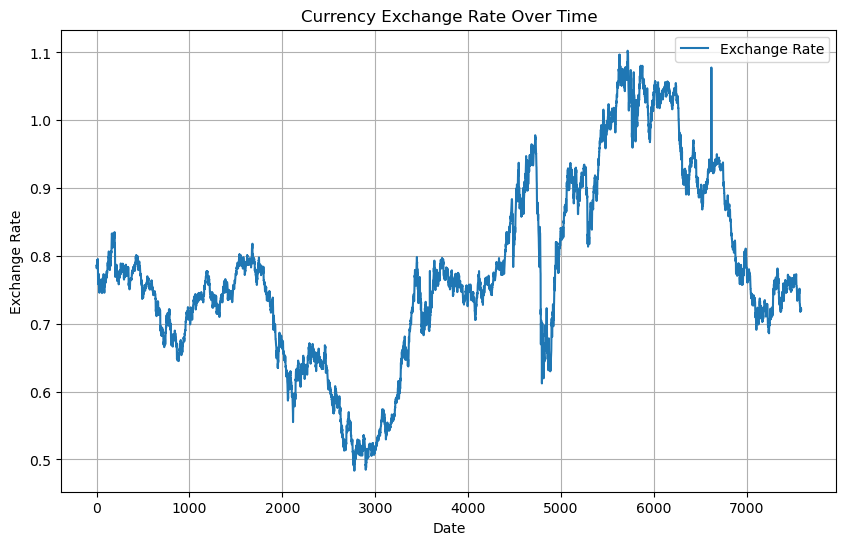

In [12]:
# Plot the time series of USD to Australian Dollar
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Exchange Rate')
plt.title('Currency Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

In [14]:
#missing values
print('missing values:',df.isnull().sum())

missing values: date       0
Ex_rate    0
dtype: int64


###### Part 2: Model Building - ARIMA
1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.


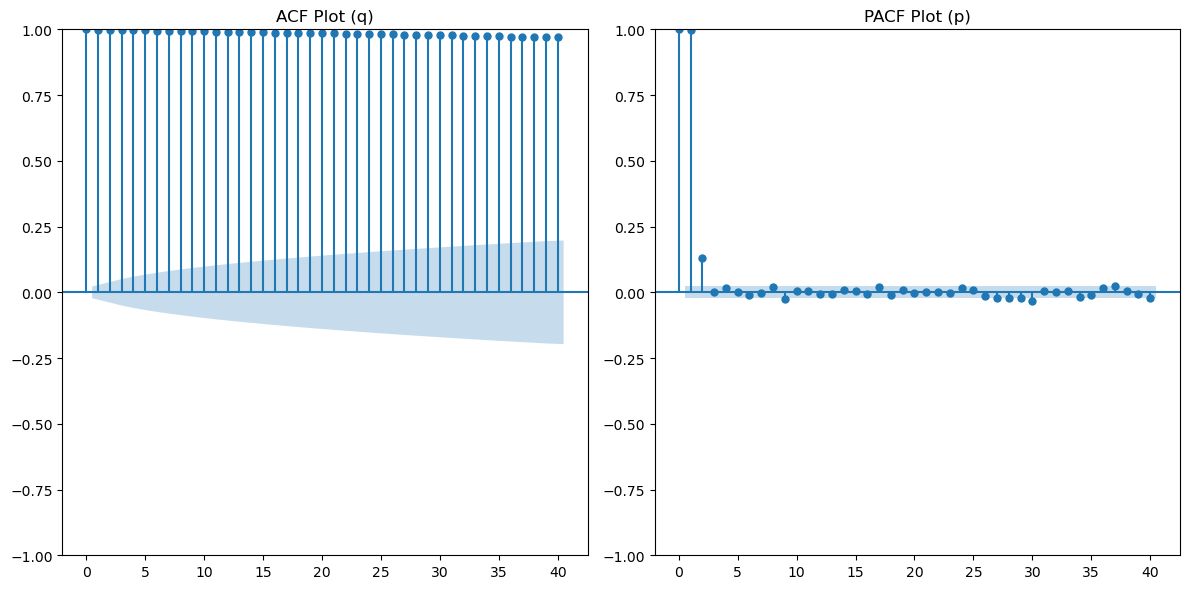

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the 'Ex_rate' time series to select p and q
plt.figure(figsize=(12,6))

# ACF plot for q (Moving Average)
plt.subplot(121)
plot_acf(df['Ex_rate'], lags=40, ax=plt.gca())
plt.title('ACF Plot (q)')

# PACF plot for p (Auto-Regressive)
plt.subplot(122)
plot_pacf(df['Ex_rate'], lags=40, ax=plt.gca())
plt.title('PACF Plot (p)')

plt.tight_layout()
plt.show()


2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model with (p=2, d=1, q=2)
arima = ARIMA(df['Ex_rate'], order=(2, 1, 2))

# Fit the model
arima_result = arima.fit()

# Summary of the model
arima_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 1, 2)   Log Likelihood               28055.068
Date:                Mon, 14 Oct 2024   AIC                         -56100.135
Time:                        16:55:02   BIC                         -56065.464
Sample:                             0   HQIC                        -56088.236
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1151      0.585     -0.197      0.844      -1.261       1.031
ar.L2          0.1132      0.088      1.293      0.196      -0.058       0.285
ma.L1         -0.0163      0.584     -0.028      0.978      -1.162       1.129
ma.L2         -0.1135      0.052     -2.172      0.030      -0.216      -0.011
sigma2      3.594e-05   1.01e-07    355.944      0.000    3.57e-05    3.61e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2863303.88
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
forecast=arima_result.predict()
forecast.head()

0    0.000000
1    0.785500
2    0.782286
3    0.786058
4    0.786135
Name: predicted_mean, dtype: float64

3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.


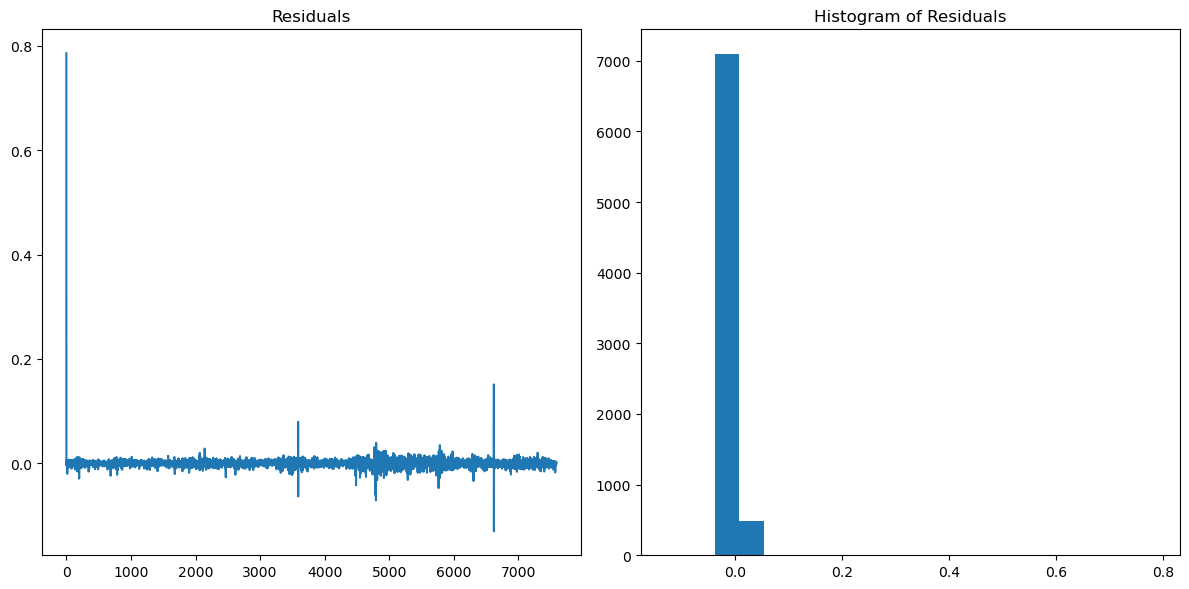

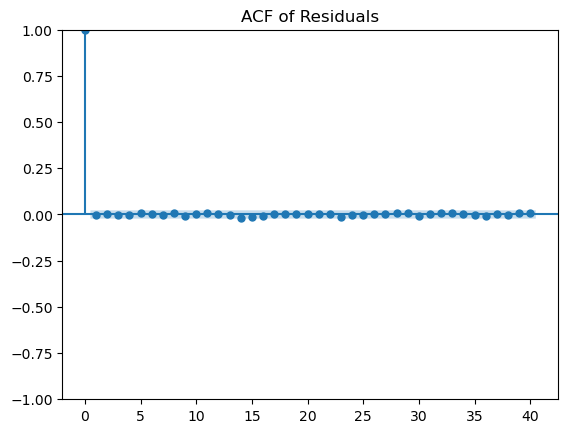

In [21]:
# Plot the residuals
residuals = arima_result.resid

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(residuals)
plt.title('Residuals')

plt.subplot(122)
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()

# Perform ACF on residuals to check if any autocorrelation remains
plot_acf(residuals, lags=40)
plt.title('ACF of Residuals')
plt.show()


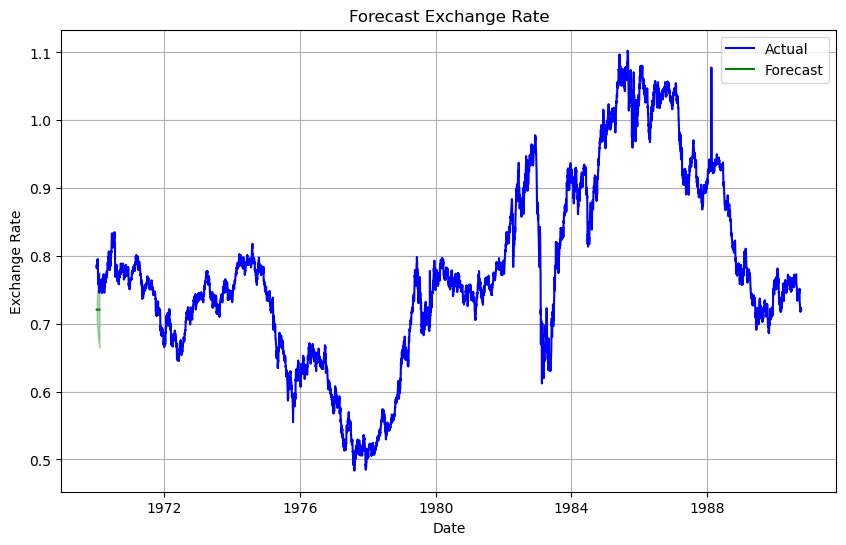

In [22]:
# Forecast future values
forecast_steps = 30  # Forecast the next 30 time steps (days, months, etc.)
forecast = arima_result.get_forecast(steps=forecast_steps)

# Get confidence intervals
forecast_ci = forecast.conf_int()

# Plot the forecasted values with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual', color='blue')

# Forecasted values
forecast_values = forecast.predicted_mean
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='D')[1:]  # Adjust frequency as needed
plt.plot(forecast_index, forecast_values, label='Forecast', color='green')

# Confidence intervals
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='green', alpha=0.3)

plt.title('Forecast Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()



In [23]:
store_predict= arima_result.forecast(steps = 15)
store_predict

7588    0.720809
7589    0.720841
7590    0.720835
7591    0.720839
7592    0.720838
7593    0.720839
7594    0.720839
7595    0.720839
7596    0.720839
7597    0.720839
7598    0.720839
7599    0.720839
7600    0.720839
7601    0.720839
7602    0.720839
Name: predicted_mean, dtype: float64

##### Part 3: Model Building - Exponential Smoothing
1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [26]:
#2. Model Selection and Fitting with Holt's Linear Trend Method
# Define and fit Holt's Linear Trend model
model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None)

# Fit the model
fit_model = model.fit(optimized=True)

# Summary of the model fit
print(fit_model.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Mon, 14 Oct 2024
Box-Cox:                          False   Time:                         16:55:05
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700395                alpha                 True
smoothing_trend           3.9825e-

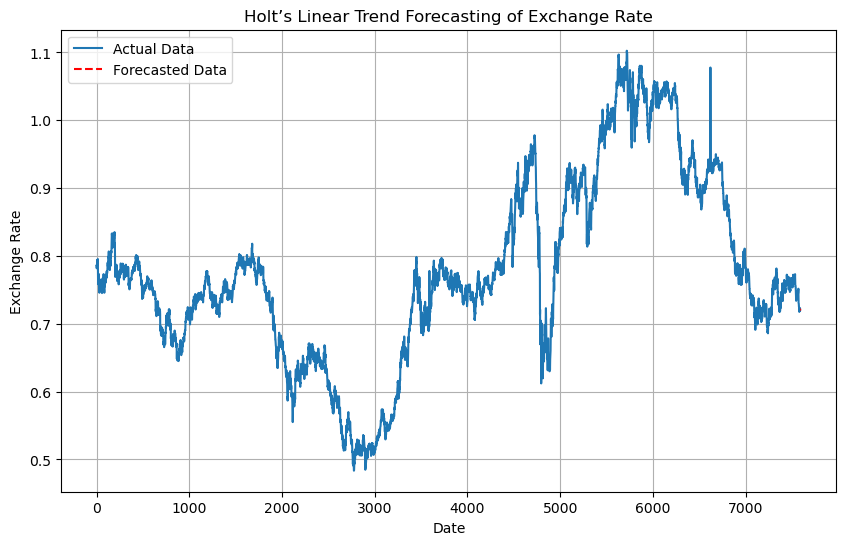

In [61]:
#3. Forecasting Future Values
# Forecast the next 12 periods (e.g., months)
forecast1 = fit_model.forecast(steps=12)

# Plot actual data and forecasted values
plt.figure(figsize=(10,6))
plt.plot(df['Ex_rate'], label='Actual Data')
plt.plot(forecast, label='Forecasted Data', color='red', linestyle='--')

plt.title('Holt’s Linear Trend Forecasting of Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
#4. Parameter Optimization Using AIC
#You can tune the model's parameters (such as smoothing levels) based on the AIC to select the best model.
# Automatically optimize parameters based on AIC
fit_model = model.fit(optimized=True)

# Print AIC value
print('AIC:', fit_model.aic)


AIC: -77641.00933462085


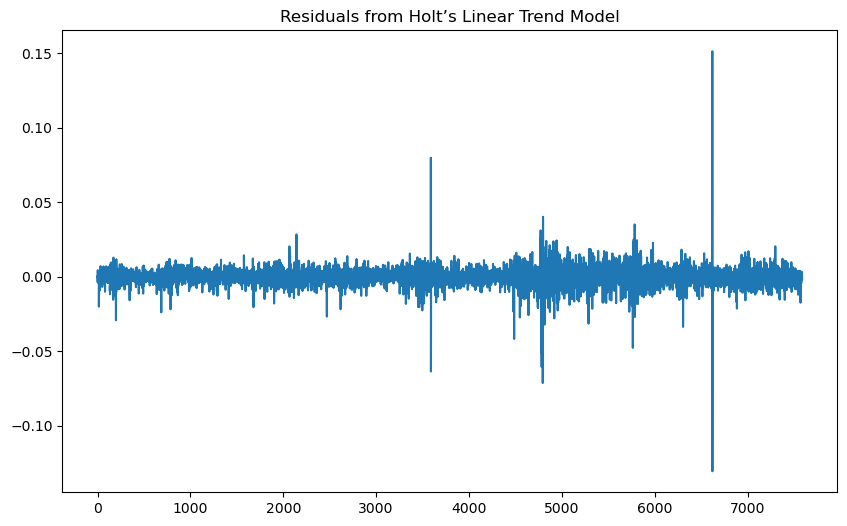

In [29]:
#5. Model Diagnostics
#It’s important to check if the residuals from the model show no significant patterns. Here's how to plot the residuals:
# Plot residuals to check for patterns
residuals = fit_model.resid
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuals from Holt’s Linear Trend Model')
plt.show()


In [30]:
#6. Comparing Forecasts with Actual Data
#Once we have the forecasted values, we can compare them with the actual data using the MAPE or RMSE metrics.
# Compute MAPE
import numpy as np

def get_mape(actual, predicted):
    """
    Calculate Mean Absolute Percentage Error (MAPE).
    
    Parameters:
    actual (array-like): Actual values
    predicted (array-like): Forecasted values
    
    Returns:
    float: MAPE value
    """
    actual, predicted = np.array(actual), np.array(predicted)
    
    # Avoid division by zero by adding a small epsilon
    epsilon = np.finfo(float).eps
    return np.mean(np.abs((actual - predicted) / (actual + epsilon))) * 100

# Compare the last 12 actual values with the 12 forecasted values
actual_last_12 = df['Ex_rate'][-12:]
mape = get_mape(actual_last_12, forecast)
print(f'MAPE for the last 12 points: {mape:.2f}%')




MAPE for the last 12 points: 0.23%


###### Part 4: Evaluation and Comparison
1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.



In [32]:
#Define Functions for Error Metrics: You may already have the MAPE function defined. Below are functions for MAE and RMSE:
def get_mae(actual, predicted):
    """
    Calculate Mean Absolute Error (MAE).
    """
    return np.mean(np.abs(actual - predicted))

def get_rmse(actual, predicted):
    """
    Calculate Root Mean Square Error (RMSE).
    """
    return np.sqrt(np.mean((actual - predicted) ** 2))


In [33]:
# Part 4: Evaluation and Comparison
# 1. Compute Error Metrics
y_true = df['Ex_rate'][-12:]  # Actual values for the last 12 months
y_true

7576    0.724506
7577    0.721553
7578    0.717618
7579    0.719114
7580    0.719114
7581    0.719735
7582    0.718701
7583    0.718494
7584    0.721839
7585    0.723197
7586    0.720825
7587    0.720825
Name: Ex_rate, dtype: float64

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_arima = mean_absolute_error(y_true, forecast)
rmse_arima = np.sqrt(mean_squared_error(y_true, forecast))
mae_es = mean_absolute_error(y_true, forecast1)
rmse_es = np.sqrt(mean_squared_error(y_true, forecast1))